In [15]:
from start_up import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [16]:
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(7, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

for i in range(7):
    circuit.h(qreg_q[i])

circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
q_6: ┤ H ├
     └───┘
c: 7/═════

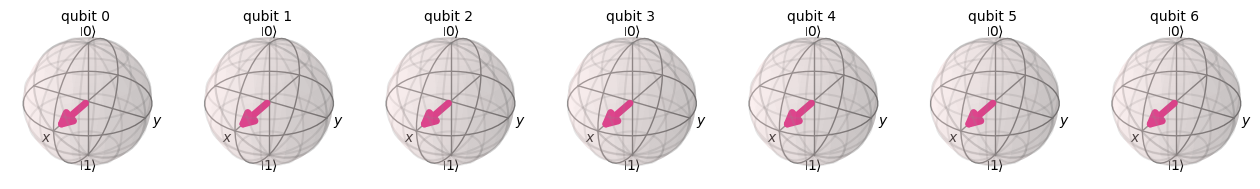

In [17]:
statevector = Statevector.from_instruction(circuit)
plot_bloch_multivector(statevector)

In [18]:
circuit.measure(qreg_q, creg_c)
circuit.save_state()

aer_simulator = AerSimulator(method="statevector")
statevector = aer_simulator.run(circuit).result().get_statevector()
print("Amplitudes:")

for i in range(7):
    print(f"  q[{i}] = {statevector[i]:.3f}")

Amplitudes:
  q[0] = 0.000+0.000j
  q[1] = 0.000+0.000j
  q[2] = 0.000+0.000j
  q[3] = 0.000+0.000j
  q[4] = 0.000+0.000j
  q[5] = 1.000+0.000j
  q[6] = 0.000+0.000j


In [19]:
for repetition in range(10):
    counts = aer_simulator.run(circuit).result().get_counts()
    measurement_result = list(counts.keys())[0]
    print(f"Experiment number {repetition} -> measurement outcome: {list(counts.keys())[0]}")

Experiment number 0 -> measurement outcome: 1100100
Experiment number 1 -> measurement outcome: 1011100
Experiment number 2 -> measurement outcome: 1000110
Experiment number 3 -> measurement outcome: 1010100
Experiment number 4 -> measurement outcome: 1010101
Experiment number 5 -> measurement outcome: 0111101
Experiment number 6 -> measurement outcome: 1110110
Experiment number 7 -> measurement outcome: 1010110
Experiment number 8 -> measurement outcome: 1111101
Experiment number 9 -> measurement outcome: 1101011


In [20]:
shots = 1000
aer_simulator = AerSimulator()
aer_simulator.set_options(shots=shots)

counts = aer_simulator.run(circuit).result().get_counts()
print(counts)

{'0100111': 4, '0001101': 5, '0001000': 6, '1101000': 7, '1100111': 5, '1101100': 9, '0001001': 7, '0110101': 5, '1111101': 7, '0110000': 2, '1101111': 7, '1000011': 11, '1101110': 7, '0011010': 7, '1100110': 8, '1000100': 4, '1011110': 9, '1001101': 6, '0010000': 8, '1111011': 7, '0100110': 6, '1111110': 5, '1110101': 4, '0000010': 7, '1000010': 7, '0001111': 2, '1011010': 5, '0010010': 8, '0111001': 7, '0010101': 9, '0001010': 9, '1010000': 15, '1111100': 9, '0100011': 9, '0010100': 7, '1000110': 9, '1001010': 14, '0000110': 6, '1011101': 9, '0010111': 6, '0100010': 13, '0010110': 7, '0011000': 8, '1001111': 7, '0011110': 5, '1001110': 14, '1011001': 10, '1000111': 8, '1001000': 11, '1101101': 8, '1100001': 11, '0100001': 12, '0110010': 7, '1110001': 8, '1111010': 1, '0101011': 8, '0011001': 8, '1110011': 8, '0101111': 5, '0101010': 7, '0011100': 13, '1110000': 10, '1110010': 8, '0011111': 4, '0101101': 7, '0110111': 12, '0000000': 7, '0110011': 7, '1011100': 7, '0111000': 8, '111011

In [21]:
how_many = 10

for i in range(how_many):
    counts = aer_simulator.run(circuit).result().get_counts()
    print(f"Random number {i}: {int(list(counts.keys())[0], 2)}")

Random number 0: 103
Random number 1: 18
Random number 2: 36
Random number 3: 106
Random number 4: 10
Random number 5: 112
Random number 6: 109
Random number 7: 8
Random number 8: 90
Random number 9: 28
